# Random Forest: Feature Selection

In [3]:
import sys
print(sys.executable)

# shift 42 days?????

/Users/kata/opt/anaconda3/bin/python


In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import treeplot
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn import tree
import warnings

warnings.simplefilter(action='ignore')

In [5]:
# https://mljar.com/blog/visualize-decision-tree/
df = pd.read_csv('/Users/kata/Desktop/GitHub/standby_duty_forecasting/sickness_table.csv', index_col=0)
df['date'] = pd.to_datetime(df['date'])
df


,date,n_sick,calls,n_duty,n_sby,sby_need,dafted
0,2016-04-01,73,8154.0,1700,90,4.0,0.0
1,2016-04-02,64,8526.0,1700,90,70.0,0.0
2,2016-04-03,68,8088.0,1700,90,0.0,0.0
3,2016-04-04,71,7044.0,1700,90,0.0,0.0
4,2016-04-05,63,7236.0,1700,90,0.0,0.0
...,...,...,...,...,...,...,...
1147,2019-05-23,86,8544.0,1900,90,0.0,0.0
1148,2019-05-24,81,8814.0,1900,90,0.0,0.0
1149,2019-05-25,76,9846.0,1900,90,146.0,56.0
1150,2019-05-26,83,9882.0,1900,90,160.0,70.0


In [6]:
df['diff_drivers'] = df['n_duty'] - df['n_sick']


df['year']= df['date'].dt.year
df['month']= df['date'].dt.month
df['day']= df['date'].dt.day

In [7]:
df['day_of_week'] = df['date'].dt.dayofweek
df


,date,n_sick,calls,n_duty,n_sby,sby_need,dafted,diff_drivers,year,month,day,day_of_week
0,2016-04-01,73,8154.0,1700,90,4.0,0.0,1627,2016,4,1,4
1,2016-04-02,64,8526.0,1700,90,70.0,0.0,1636,2016,4,2,5
2,2016-04-03,68,8088.0,1700,90,0.0,0.0,1632,2016,4,3,6
3,2016-04-04,71,7044.0,1700,90,0.0,0.0,1629,2016,4,4,0
4,2016-04-05,63,7236.0,1700,90,0.0,0.0,1637,2016,4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1147,2019-05-23,86,8544.0,1900,90,0.0,0.0,1814,2019,5,23,3
1148,2019-05-24,81,8814.0,1900,90,0.0,0.0,1819,2019,5,24,4
1149,2019-05-25,76,9846.0,1900,90,146.0,56.0,1824,2019,5,25,5
1150,2019-05-26,83,9882.0,1900,90,160.0,70.0,1817,2019,5,26,6


In [8]:
df['week'] = df['date'].dt.isocalendar().week

In [9]:
df['week'] = df['week'].astype(np.int64)

In [10]:
# convert week to uint64 because of xgboost error
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1152 entries, 0 to 1151
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1152 non-null   datetime64[ns]
 1   n_sick        1152 non-null   int64         
 2   calls         1152 non-null   float64       
 3   n_duty        1152 non-null   int64         
 4   n_sby         1152 non-null   int64         
 5   sby_need      1152 non-null   float64       
 6   dafted        1152 non-null   float64       
 7   diff_drivers  1152 non-null   int64         
 8   year          1152 non-null   int64         
 9   month         1152 non-null   int64         
 10  day           1152 non-null   int64         
 11  day_of_week   1152 non-null   int64         
 12  week          1152 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(9)
memory usage: 126.0 KB


In [11]:
X = df[['n_sick', 'calls', 'n_duty', 'n_sby', 'diff_drivers', 'year', 'month', 'day_of_week',
       'week']]
y = df.sby_need

In [12]:
def train_test_split(data, n_test):
	return data[:n_test], data[n_test:]

In [13]:

x_train, x_test = train_test_split(X, 921)
y_train, y_test = train_test_split(y, 921)


In [14]:
tree_reg = DecisionTreeRegressor(max_depth=7, random_state=42)
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=7, random_state=42)

In [15]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [16]:
ax = treeplot.plot(tree_reg, plottype='vertical')


[treeplot] >Install graphviz first: <sudo apt install python-pydot python-pydot-ng graphviz>


In [17]:
test_pred = tree_reg.predict(x_test)
train_pred = tree_reg.predict(x_train)
y2 = np.concatenate((train_pred, test_pred))



In [18]:
# create column numerate
df['numbers'] = np.arange(len(df))
df

,date,n_sick,calls,n_duty,n_sby,sby_need,dafted,diff_drivers,year,month,day,day_of_week,week,numbers
0,2016-04-01,73,8154.0,1700,90,4.0,0.0,1627,2016,4,1,4,13,0
1,2016-04-02,64,8526.0,1700,90,70.0,0.0,1636,2016,4,2,5,13,1
2,2016-04-03,68,8088.0,1700,90,0.0,0.0,1632,2016,4,3,6,13,2
3,2016-04-04,71,7044.0,1700,90,0.0,0.0,1629,2016,4,4,0,14,3
4,2016-04-05,63,7236.0,1700,90,0.0,0.0,1637,2016,4,5,1,14,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,2019-05-23,86,8544.0,1900,90,0.0,0.0,1814,2019,5,23,3,21,1147
1148,2019-05-24,81,8814.0,1900,90,0.0,0.0,1819,2019,5,24,4,21,1148
1149,2019-05-25,76,9846.0,1900,90,146.0,56.0,1824,2019,5,25,5,21,1149
1150,2019-05-26,83,9882.0,1900,90,160.0,70.0,1817,2019,5,26,6,21,1150


In [19]:
y_test.shape
df.numbers.iloc[921:].shape

(231,)

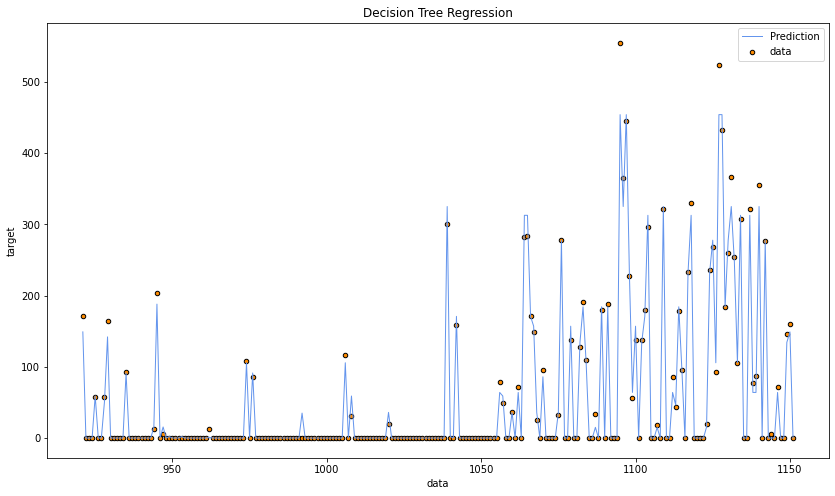

In [20]:

# Plot the results
plt.figure(figsize=(14,8))
plt.scatter(df.numbers.iloc[921:], y_test, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(df.numbers.iloc[921:], test_pred, color="cornflowerblue", label="Prediction", linewidth=1)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()



In [21]:
print('mse test set ' + str(mean_squared_error(y_test, test_pred)))
print('mse train set ' + str(mean_squared_error(y_train, train_pred)))


mse test set 135.39710057327403
mse train set 8.92393490512383


In [22]:
# max depth 7
# mse test set 67.99505531505531
# mse train set 0.10941006152732537

In [23]:
#max depth 5
# mse test set 68.29361982132801
# mse train set 3.589715752337902

Feature: n_sick, Score: 0.00353
Feature: calls, Score: 0.86364
Feature: n_duty, Score: 0.00048
Feature: n_sby, Score: 0.00000
Feature: diff_drivers, Score: 0.10871
Feature: year, Score: 0.02167
Feature: month, Score: 0.00091
Feature: day_of_week, Score: 0.00035
Feature: week, Score: 0.00071


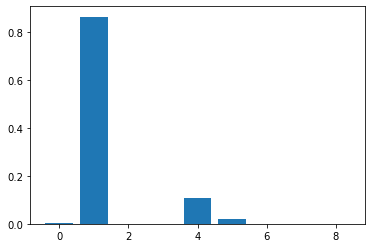

In [24]:
# https://machinelearningmastery.com/calculate-feature-importance-with-python/

#CART
model = DecisionTreeRegressor()
# fit the model
model.fit(x_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in zip(x_train.columns, enumerate(importance)):
	print('Feature: %s, Score: %.5f' % (i,v[1]))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [25]:
# https://machinelearningmastery.com/calculate-feature-importance-with-python/


In [26]:
from sklearn.ensemble import RandomForestRegressor


Feature: n_sick, Score: 0.00436
Feature: calls, Score: 0.86793
Feature: n_duty, Score: 0.01507
Feature: n_sby, Score: 0.00000
Feature: diff_drivers, Score: 0.09311
Feature: year, Score: 0.01494
Feature: month, Score: 0.00097
Feature: day_of_week, Score: 0.00179
Feature: week, Score: 0.00185


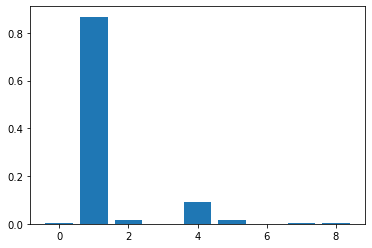

In [27]:
model = RandomForestRegressor()
# fit the model
model.fit(x_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in zip(x_train.columns, enumerate(importance)):
	print('Feature: %s, Score: %.5f' % (i,v[1]))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [28]:
import xgboost
from xgboost import XGBRegressor
from sklearn import preprocessing



Feature: n_sick, Score: 0.00136
Feature: calls, Score: 0.42730
Feature: n_duty, Score: 0.45478
Feature: n_sby, Score: 0.00000
Feature: diff_drivers, Score: 0.11395
Feature: year, Score: 0.00000
Feature: month, Score: 0.00030
Feature: day_of_week, Score: 0.00174
Feature: week, Score: 0.00057


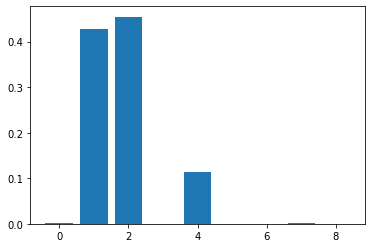

In [29]:
# xgboost


model = XGBRegressor()
# fit the model
model.fit(x_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in zip(x_train.columns, enumerate(importance)):
	print('Feature: %s, Score: %.5f' % (i,v[1]))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()



In [30]:
# permutation
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance

Feature: n_sick, Score: 3.83769
Feature: calls, Score: 11386.56383
Feature: n_duty, Score: 608.38417
Feature: n_sby, Score: 0.00000
Feature: diff_drivers, Score: 457.91394
Feature: year, Score: 0.00000
Feature: month, Score: 0.03606
Feature: day_of_week, Score: 0.01624
Feature: week, Score: 0.57547


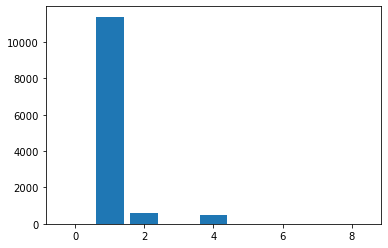

In [31]:
model = KNeighborsRegressor()
# fit the model
model.fit(x_train, y_train)
# perform permutation importance
results = permutation_importance(model, x_train, y_train, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in zip(x_train.columns, enumerate(importance)):
	print('Feature: %s, Score: %.5f' % (i,v[1]))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [32]:
# https://machinelearningmastery.com/xgboost-for-time-series-forecasting/
import xgboost
print("xgboost", xgboost.__version__)


xgboost 1.6.1


In [33]:
model = XGBRegressor()

In [34]:
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [35]:
pred_y = model.predict(x_test)

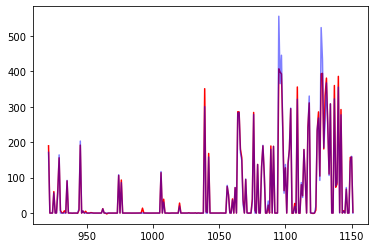

In [36]:
plt.plot(x_test.index, pred_y, color='red', label='pred')
plt.plot(x_test.index, y_test, color='blue', label='true', alpha=0.5)
plt.show()

In [37]:
mean_squared_error(y_test, pred_y)


258.36230857332663

In [38]:
# best mse with only sby need

In [39]:
# https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/

[1.3626566e-03 4.2730123e-01 4.5477560e-01 0.0000000e+00 1.1395307e-01
 0.0000000e+00 2.9549911e-04 1.7391881e-03 5.7278550e-04]


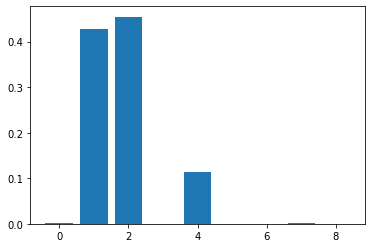

In [40]:
model = XGBRegressor()
model.fit(x_train, y_train)
# feature importance
print(model.feature_importances_)
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [41]:
#SARIMA with only calls
X.to_csv('out.csv', index=False)


In [42]:
#split dfs
l = [275, 640, 1005, 1152]
l_mod = [0] + l + [max(l)+1]

list_of_dfs = [df.iloc[l_mod[n]:l_mod[n+1]] for n in range(len(l_mod)-1)]


In [43]:
df_2016 = list_of_dfs[0]
df_2017 = list_of_dfs[1]
df_2018 = list_of_dfs[2]
df_2019 = list_of_dfs[3]

In [44]:
# aggregate 2016
df_2016['mean_calls'] = df_2016.groupby('week')[['calls']].transform('mean')

In [45]:
# aggregate 2017
df_2017['mean_calls'] = df_2017.groupby('week')[['calls']].transform('mean')

In [46]:
# aggregate 2018
df_2018['mean_calls'] = df_2018.groupby('week')[['calls']].transform('mean')

In [47]:
# aggregate 2019
df_2019['mean_calls'] = df_2019.groupby('week')[['calls']].transform('mean')

In [48]:
# combine
complete_df = df_2016.append([df_2017, df_2018, df_2019])
display(complete_df)

,date,n_sick,calls,n_duty,n_sby,sby_need,dafted,diff_drivers,year,month,day,day_of_week,week,numbers,mean_calls
0,2016-04-01,73,8154.0,1700,90,4.0,0.0,1627,2016,4,1,4,13,0,8256.000000
1,2016-04-02,64,8526.0,1700,90,70.0,0.0,1636,2016,4,2,5,13,1,8256.000000
2,2016-04-03,68,8088.0,1700,90,0.0,0.0,1632,2016,4,3,6,13,2,8256.000000
3,2016-04-04,71,7044.0,1700,90,0.0,0.0,1629,2016,4,4,0,14,3,6700.285714
4,2016-04-05,63,7236.0,1700,90,0.0,0.0,1637,2016,4,5,1,14,4,6700.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,2019-05-23,86,8544.0,1900,90,0.0,0.0,1814,2019,5,23,3,21,1147,9190.285714
1148,2019-05-24,81,8814.0,1900,90,0.0,0.0,1819,2019,5,24,4,21,1148,9190.285714
1149,2019-05-25,76,9846.0,1900,90,146.0,56.0,1824,2019,5,25,5,21,1149,9190.285714
1150,2019-05-26,83,9882.0,1900,90,160.0,70.0,1817,2019,5,26,6,21,1150,9190.285714


In [49]:
# SARIMA with aggregated calls

import itertools


p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 52)
SARIMAX: (0, 0, 1) x (0, 1, 0, 52)
SARIMAX: (0, 1, 0) x (0, 1, 1, 52)
SARIMAX: (0, 1, 0) x (1, 0, 0, 52)


In [50]:
import statsmodels.api as sm


# grid search arima parameters
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(complete_df.mean_calls, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{}52 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 52)52 - AIC:23949.412178022398
ARIMA(0, 0, 0)x(0, 0, 1, 52)52 - AIC:21571.78820365446
ARIMA(0, 0, 0)x(0, 1, 0, 52)52 - AIC:18157.185370113006
ARIMA(0, 0, 0)x(0, 1, 1, 52)52 - AIC:17282.361557312433
ARIMA(0, 0, 0)x(1, 0, 0, 52)52 - AIC:18171.541980448295
ARIMA(0, 0, 0)x(1, 0, 1, 52)52 - AIC:18153.054524189225
ARIMA(0, 0, 0)x(1, 1, 0, 52)52 - AIC:17304.74899367397
ARIMA(0, 0, 0)x(1, 1, 1, 52)52 - AIC:17148.957974056597
ARIMA(0, 0, 1)x(0, 0, 0, 52)52 - AIC:22407.90599089592
ARIMA(0, 0, 1)x(0, 0, 1, 52)52 - AIC:20204.62288859689
ARIMA(0, 0, 1)x(0, 1, 0, 52)52 - AIC:17178.95987837261
ARIMA(0, 0, 1)x(0, 1, 1, 52)52 - AIC:16254.388875240362
ARIMA(0, 0, 1)x(1, 0, 0, 52)52 - AIC:17219.681887188286


/Users/kata/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 1, 52)52 - AIC:17171.84587207363
ARIMA(0, 0, 1)x(1, 1, 0, 52)52 - AIC:16357.422336874204
ARIMA(0, 0, 1)x(1, 1, 1, 52)52 - AIC:16159.088169418248
ARIMA(0, 1, 0)x(0, 0, 0, 52)52 - AIC:16095.086042603913
ARIMA(0, 1, 0)x(0, 0, 1, 52)52 - AIC:15363.838372221157
ARIMA(0, 1, 0)x(0, 1, 0, 52)52 - AIC:16118.565781401154
ARIMA(0, 1, 0)x(0, 1, 1, 52)52 - AIC:14718.973584321195
ARIMA(0, 1, 0)x(1, 0, 0, 52)52 - AIC:15376.826840405163
ARIMA(0, 1, 0)x(1, 0, 1, 52)52 - AIC:15365.83837188757
ARIMA(0, 1, 0)x(1, 1, 0, 52)52 - AIC:15060.732308012302
ARIMA(0, 1, 0)x(1, 1, 1, 52)52 - AIC:14716.955843194932
ARIMA(0, 1, 1)x(0, 0, 0, 52)52 - AIC:16084.067678917681
ARIMA(0, 1, 1)x(0, 0, 1, 52)52 - AIC:15352.82549715993
ARIMA(0, 1, 1)x(0, 1, 0, 52)52 - AIC:16106.971438861314
ARIMA(0, 1, 1)x(0, 1, 1, 52)52 - AIC:14707.46536369531
ARIMA(0, 1, 1)x(1, 0, 0, 52)52 - AIC:15378.803466376754
ARIMA(0, 1, 1)x(1, 0, 1, 52)52 - AIC:15355.137753054754
ARIMA(0, 1, 1)x(1, 1, 0, 52)52 - AIC:15060.301669926

/Users/kata/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(0, 1, 1, 52)52 - AIC:14683.076245115666
ARIMA(1, 1, 1)x(1, 0, 0, 52)52 - AIC:15367.814855169201
ARIMA(1, 1, 1)x(1, 0, 1, 52)52 - AIC:15356.825498118531
ARIMA(1, 1, 1)x(1, 1, 0, 52)52 - AIC:15028.030856381138


/Users/kata/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(1, 1, 1, 52)52 - AIC:14681.525501752336


In [62]:
# ARIMA(1, 1, 1)x(1, 1, 1, 52)52 - AIC:14681.525501752336
# fitting the ARIMA model
mod = sm.tsa.statespace.SARIMAX(complete_df.mean_calls.iloc[:920],
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 52),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])
#print(results.summary())

/Users/kata/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8818      0.037     23.799      0.000       0.809       0.954
ma.L1         -1.0435      0.023    -45.972      0.000      -1.088      -0.999
ar.S.L52      -0.0647      0.038     -1.721      0.085      -0.138       0.009
ma.S.L52      -1.0001      0.049    -20.571      0.000      -1.095      -0.905
sigma2      5.922e+04   8.21e-07   7.21e+10      0.000    5.92e+04    5.92e+04


<AxesSubplot:>

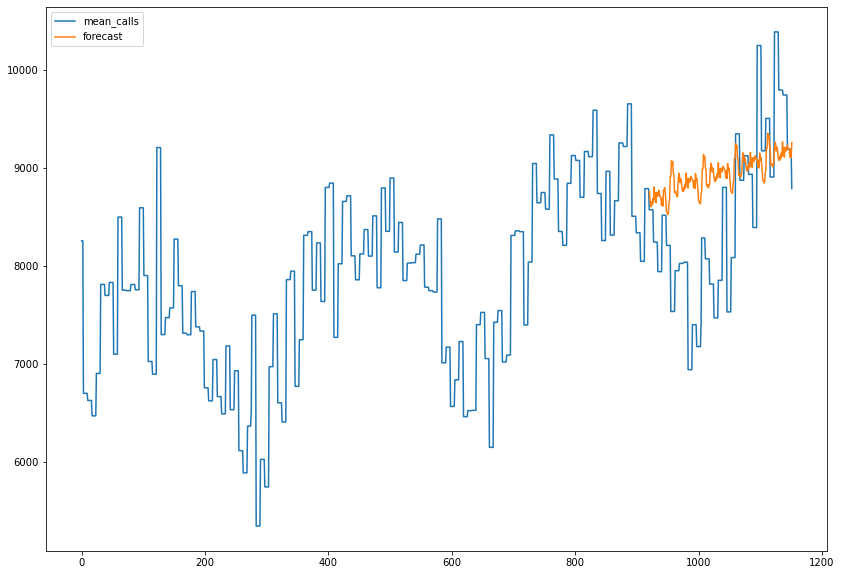

In [63]:
complete_df['forecast']=results.predict(start=920, end=1151, dynamic=True)
complete_df[['mean_calls','forecast']].plot(figsize=(14,10))

,date,n_sick,calls,n_duty,n_sby,sby_need,dafted,diff_drivers,year,month,day,day_of_week,week,numbers,mean_calls,forecast
0,2016-04-01,73,8154.0,1700,90,4.0,0.0,1627,2016,4,1,4,13,0,8256.000000,NaN
1,2016-04-02,64,8526.0,1700,90,70.0,0.0,1636,2016,4,2,5,13,1,8256.000000,NaN
2,2016-04-03,68,8088.0,1700,90,0.0,0.0,1632,2016,4,3,6,13,2,8256.000000,NaN
3,2016-04-04,71,7044.0,1700,90,0.0,0.0,1629,2016,4,4,0,14,3,6700.285714,NaN
4,2016-04-05,63,7236.0,1700,90,0.0,0.0,1637,2016,4,5,1,14,4,6700.285714,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,2019-05-23,86,8544.0,1900,90,0.0,0.0,1814,2019,5,23,3,21,1147,9190.285714,9181.210399
1148,2019-05-24,81,8814.0,1900,90,0.0,0.0,1819,2019,5,24,4,21,1148,9190.285714,9113.489956
1149,2019-05-25,76,9846.0,1900,90,146.0,56.0,1824,2019,5,25,5,21,1149,9190.285714,9182.752551
1150,2019-05-26,83,9882.0,1900,90,160.0,70.0,1817,2019,5,26,6,21,1150,9190.285714,9107.479496


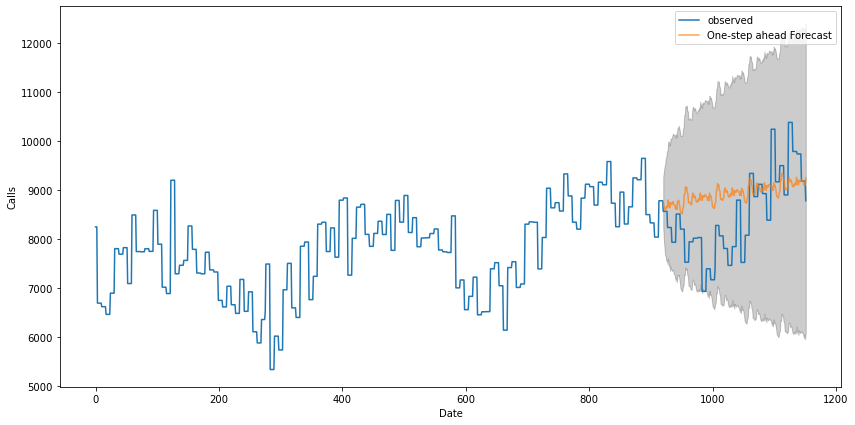

In [64]:
pred = results.get_prediction(start=920, end=1151, dynamic=False)
pred_ci = pred.conf_int()
ax = complete_df.mean_calls.iloc[0:].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Calls')
#ax.set_xticks((0, 920))
#ax.set_xticklabels(['1. 4. 2016', '8. 10. 2018'])
#plt.axvline(x=920, color = 'red')
plt.legend()
plt.show()

In [65]:
# with pred mean
y_forecasted = pred.predicted_mean
y_truth = df.calls[920:]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 1747815.16
The Root Mean Squared Error is 1322.05


In [66]:
series1=results.predict(start=920, end=1151, dynamic=False)

series2 = pred.predicted_mean

In [67]:
y_forecasted2 = series1
y_truth2 = df.calls[920:]
mse2 = ((y_forecasted2 - y_truth2) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse2, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse2), 2)))

The Mean Squared Error of our forecasts is 1747815.16
The Root Mean Squared Error is 1322.05
